In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st
import math
from scipy.stats import f_oneway

# Importation et Nettoyage des Bases de Données

## Importer les bases et vérifier s'il y a des valeurs nulles ou des doublons

### customers.csv

In [2]:
# Importer la base customer
df_customers = pd.read_csv('customers.csv')

print(df_customers.shape)

df_customers.info()

(8623, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [3]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Vérifier s'il y a des doublons
df_customers['client_id'].duplicated().sum()

0

In [5]:
# Vérifier les âges les plus élevés et les plus jeunes (négatif ou trop élevé)
df_customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


### products.csv

In [6]:
df_products = pd.read_csv('products.csv')

print(df_products.shape)

df_products.info()

(3287, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
# Vérifier s'il y a des doublons
df_products['id_prod'].duplicated().sum()

0

In [9]:
# Vérifier s'il ya des valeurs incohérentes ou négatives 
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


**Valeur de prix négative : -1.00€**

In [10]:
sorted_df_price = df_products.sort_values(by='price')

sorted_df_price

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [11]:
# Ecarter le produit T_0 du dataframe :
df_products = df_products[df_products['id_prod'] != 'T_0']

In [12]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


### transactions.csv

In [13]:
df_transactions = pd.read_csv('transactions.csv')

print(df_transactions.shape)

df_transactions.info()

(679532, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [15]:
# Vérifier s'il y a des doublons
df_transactions.duplicated().sum()

126

In [16]:
# Afficher les doublons 
doublon = df_transactions[df_transactions.duplicated() == True]

doublon.head()

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1


Il semble qu'il s'agisse d'un **test**, ce que l'on peut vérifier par exemple par **l'id_prod T_0**.

In [17]:
print(doublon['id_prod'].str.contains('T_0').count())

126


Il s'agit bien uniquement de **tests, que l'on peut donc écarter**. 

In [18]:
# Vérifions s'il y a eu d'autres tests qui ne sont pas apparus comme doublon
test_id_prod = df_transactions[df_transactions['id_prod'] == 'T_0']

test_id_prod.shape

(200, 4)

In [19]:
# Même vérification sur la colonne date
df_test_dates = df_transactions[df_transactions['date'].str.contains('test')]

print(df_test_dates.shape)

(200, 4)


Il y a eu 200 test au total, que l'on peut exclure du dataframe. 

In [20]:
# Ecarter les tests du dataframe
df_transactions_ok = df_transactions[df_transactions['id_prod'] != 'T_0']

print(df_transactions_ok.shape)

(679332, 4)


## Jointure entre les Dataframes

### Première jointure : customers et transactions

In [21]:
# Client id sur transaction 
df_customers_transactions = df_customers.merge(df_transactions_ok, on='client_id', how='outer', indicator = True)

print(df_customers_transactions.shape)

df_customers_transactions.head()

(679355, 7)


,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both


In [22]:
# Vérifier les lignes pour lesquelles on n'a pas eu de correspondances
test2 = df_customers_transactions[df_customers_transactions['_merge'] != 'both']

test2.head()

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaN,NaN,left_only
200286,c_3789,f,1997,NaN,NaN,NaN,left_only
218173,c_4406,f,1998,NaN,NaN,NaN,left_only
218174,ct_0,f,2001,NaN,NaN,NaN,left_only
220389,c_2706,f,1967,NaN,NaN,NaN,left_only


Il s'agit d'**id client pour lesquels aucun achat n'a été enregistré**.

Le choix est fait de les retirer de l'analyse.

In [23]:
# Supprimer les client_id qui n'ont pas pas effectués d'achats
df_customers_transactions_ok = df_customers_transactions[df_customers_transactions['_merge'] == 'both']

# Supprimer la colonne d'indicator '_merge'
df_customers_transactions_ok = df_customers_transactions_ok.drop(['_merge'], axis=1)

print(df_customers_transactions_ok.shape)

(679332, 6)


### Seconde jointure : customers_transactions et products

In [24]:
# Product id sur transaction
df_product_transactions_customers = df_customers_transactions_ok.merge(df_products, on='id_prod', how='outer', indicator=True)

print(df_product_transactions_customers.shape)

(679353, 9)


In [25]:
# Vérifier les lignes pour lesquelles aucune correspondance n'a été trouvée
test3 = df_product_transactions_customers[df_product_transactions_customers['_merge'] != 'both']

test3

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
679348,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0.0,right_only
679349,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2.0,right_only
679350,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0.0,right_only
679351,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0.0,right_only


**Deux cas se présentent :**

Cas n°1 : **'left_only** *(id_prod = 2245)* correspond aux produits qui ne figurent pas dans la base produit et dont le prix et la catégorie ne sont pas renseignés. On peut écarter ces lignes du dataframe pour ne pas fausser la suite de l'analyse. 

Cas n°2 : **'right_only'** correspond aux produits pour lesquels aucune transaction n'a été enregistrée, pour éviter des problèmes par la suite on peut écarter également ces lignes. 

In [26]:
# Supprimer les client_id qui n'ont pas pas effectués d'achats
df_final = df_product_transactions_customers[df_product_transactions_customers['_merge'] == 'both']

# Supprimer la colonne d'indicator '_merge'
df_final = df_final.drop(['_merge'], axis=1)

# Remettre la colonne catégorie en integer (comme elle l'était à l'origine)
df_final['categ'] = df_final['categ'].astype(int)

print(df_final.shape)
df_final.head()

(679111, 8)


,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   679111 non-null  object 
 1   sex         679111 non-null  object 
 2   birth       679111 non-null  float64
 3   id_prod     679111 non-null  object 
 4   date        679111 non-null  object 
 5   session_id  679111 non-null  object 
 6   price       679111 non-null  float64
 7   categ       679111 non-null  int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 44.0+ MB


# Analyse des indicateurs de vente demandés par Antoine

## Indicateurs et graphiques concernant le Chiffre d'Affaire

### Modifier la structure des dates pour faciliter l'analyse par période

In [28]:
# Convertir la colonne date au format datetime
df_final['date'] = pd.to_datetime(df_final['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [29]:
# Ajouter des colonnes mois, année, date et heure
df_final['mois'] = df_final['date'].dt.strftime("%Y-%m")
df_final['annee'] = df_final['date'].dt.strftime("%Y")
df_final['time'] = [d.time() for d in df_final['date']]
df_final['date'] = [d.date() for d in df_final['date']]

df_final.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,mois,annee,time
0,c_4410,f,1967.0,0_1316,2021-12-29,s_141762,7.2,0,2021-12,2021,09:11:18.860592
1,c_4410,f,1967.0,0_1316,2022-03-29,s_186233,7.2,0,2022-03,2022,09:11:18.860592
2,c_4410,f,1967.0,0_1316,2022-05-29,s_215758,7.2,0,2022-05,2022,09:11:18.860592
3,c_3654,f,1978.0,0_1316,2021-11-26,s_125143,7.2,0,2021-11,2021,03:51:34.068872
4,c_3654,f,1978.0,0_1316,2022-08-26,s_258546,7.2,0,2022-08,2022,03:51:34.068872


### Evolution du Chiffre d'Affaire

#### CA Journalier

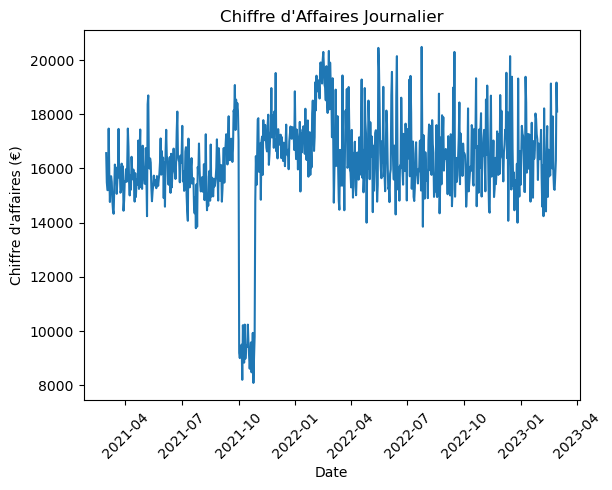

In [30]:
# Grouper les transaction par date
daily_turnover = df_final.groupby('date')['price'].sum()

# Afficher le graphique
plt.plot(daily_turnover.index, daily_turnover.values)
plt.title('Chiffre d\'Affaires Journalier')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires (€)')
plt.xticks(rotation=45)
plt.show()

#### CA Cumulé sur la période

In [31]:
# Ajouter une colonne CA cumulé
df_final["CA_cumule"] = df_final["price"].cumsum()

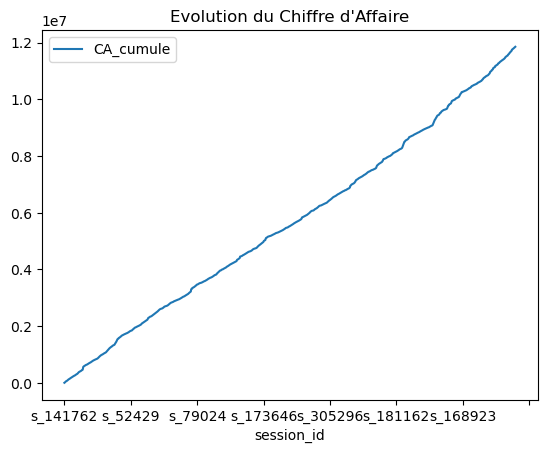

In [32]:
# Créer un graphique d'évolution du CA
ca_cumule = df_final[["CA_cumule","session_id"]]

ca_cumule_plot = ca_cumule.plot.line(y="CA_cumule", x='session_id')

ca_cumule_plot.set_title("Evolution du Chiffre d'Affaire")

plt.show()

#### Chiffre d'affaire total sur la période

In [33]:
# Afficher de CA Total
ca_total = df_final['price'].sum()

print("Chiffre d'affaire total : {:,.2f}€".format(ca_total) )

Chiffre d'affaire total : 11,853,728.68€


### Représentation graphique du CA par catégorie

#### Calculer le CA par mois et par catégorie

In [34]:
# Créer un dataframe avec le chiffre d'affaire par mois et par catégorie. 
df_grouped = df_final.groupby(['mois', 'categ'])['price'].sum().reset_index()

df_grouped.head()

,mois,categ,price
0,2021-03,0,193629.17
1,2021-03,1,186974.17
2,2021-03,2,101837.27
3,2021-04,0,205222.46
4,2021-04,1,156138.35


In [35]:
# Utiliser la méthode Pivot pour obtenir une série par catégorie
df_pivot = df_grouped.pivot(index=['mois'], columns='categ', values='price')

df_pivot.head()

categ,0,1,2
mois,,,
2021-03,193629.17,186974.17,101837.27
2021-04,205222.46,156138.35,114748.49
2021-05,196186.72,165893.40,130863.35
2021-06,167943.15,189162.04,126983.37
2021-07,144750.79,188523.27,149561.34


#### Affichage graphique 

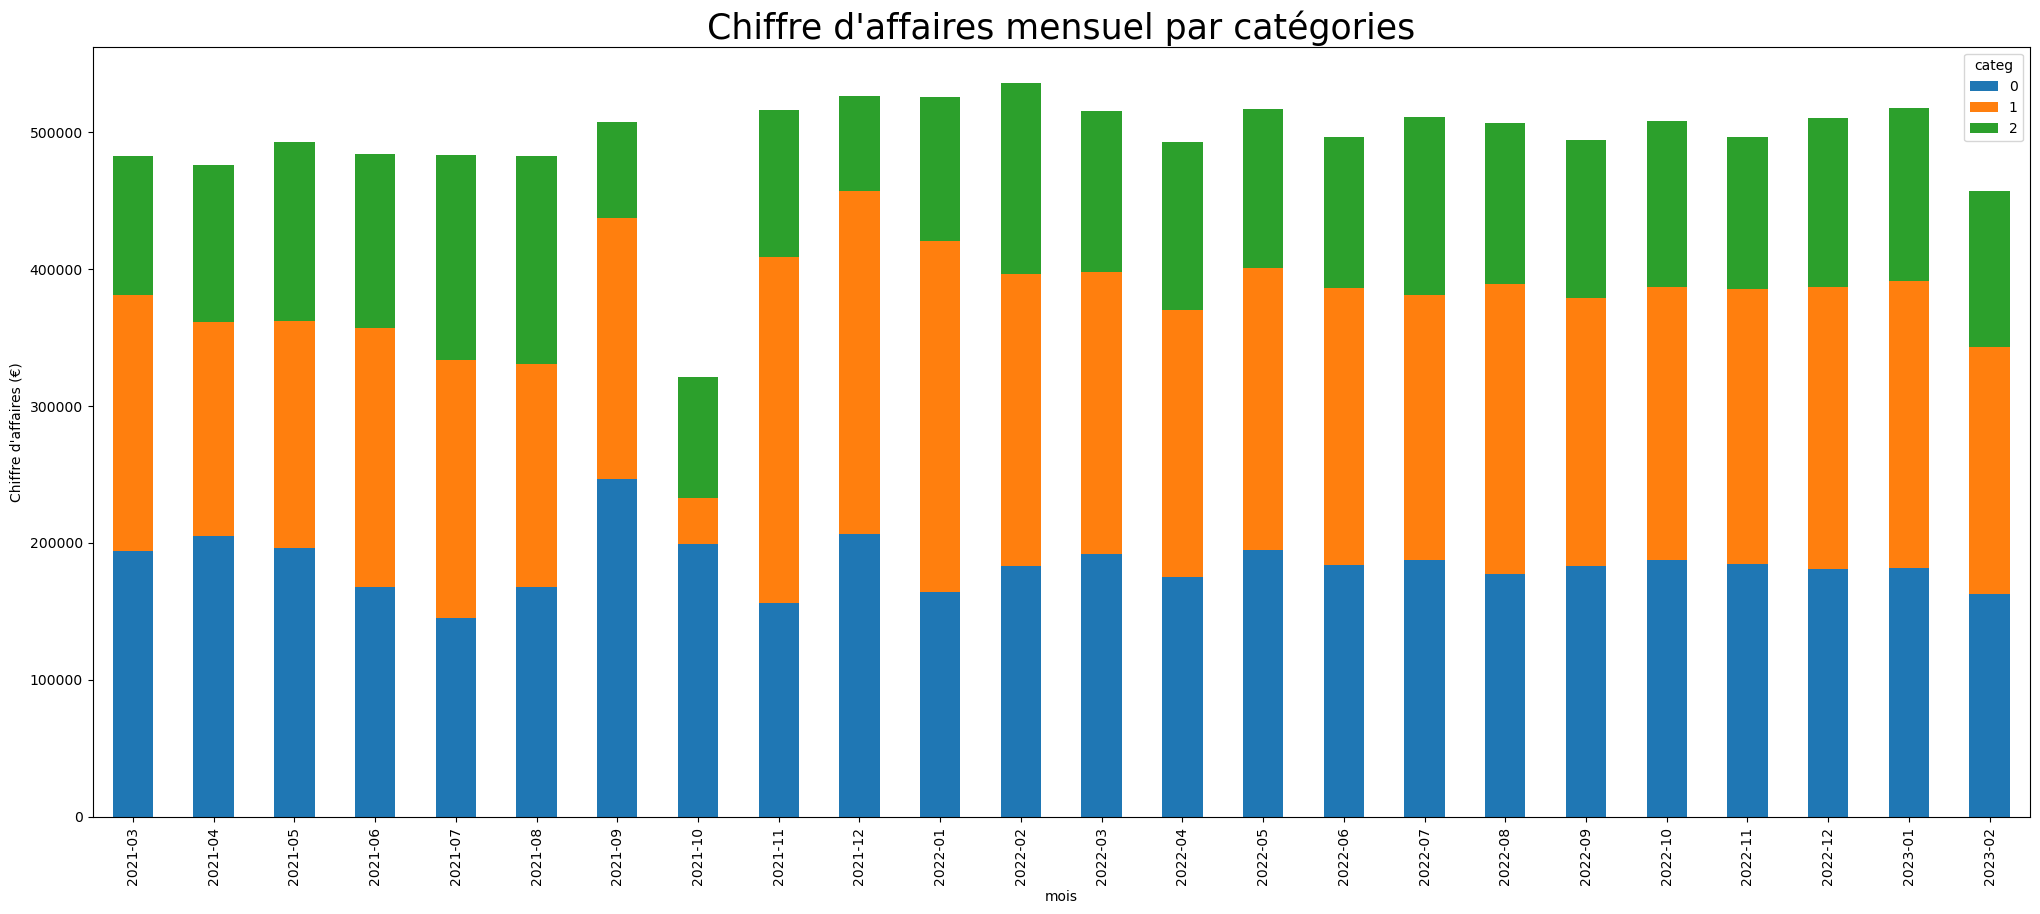

In [36]:
# Afficher le graphique en barre empilé avec le CA par catégorie
df_pivot.plot.bar(y=[0, 1, 2], stacked=True, figsize=(25,10))

plt.title("Chiffre d'affaires mensuel par catégories", fontsize=25)
plt.ylabel("Chiffre d'affaires (€)")

plt.show()

Il semble y avoir un **problème avec les données pour la catégorie 1 du mois d'octobre 2021**.

Retirons ce mois pour la suite de l'analyse. 

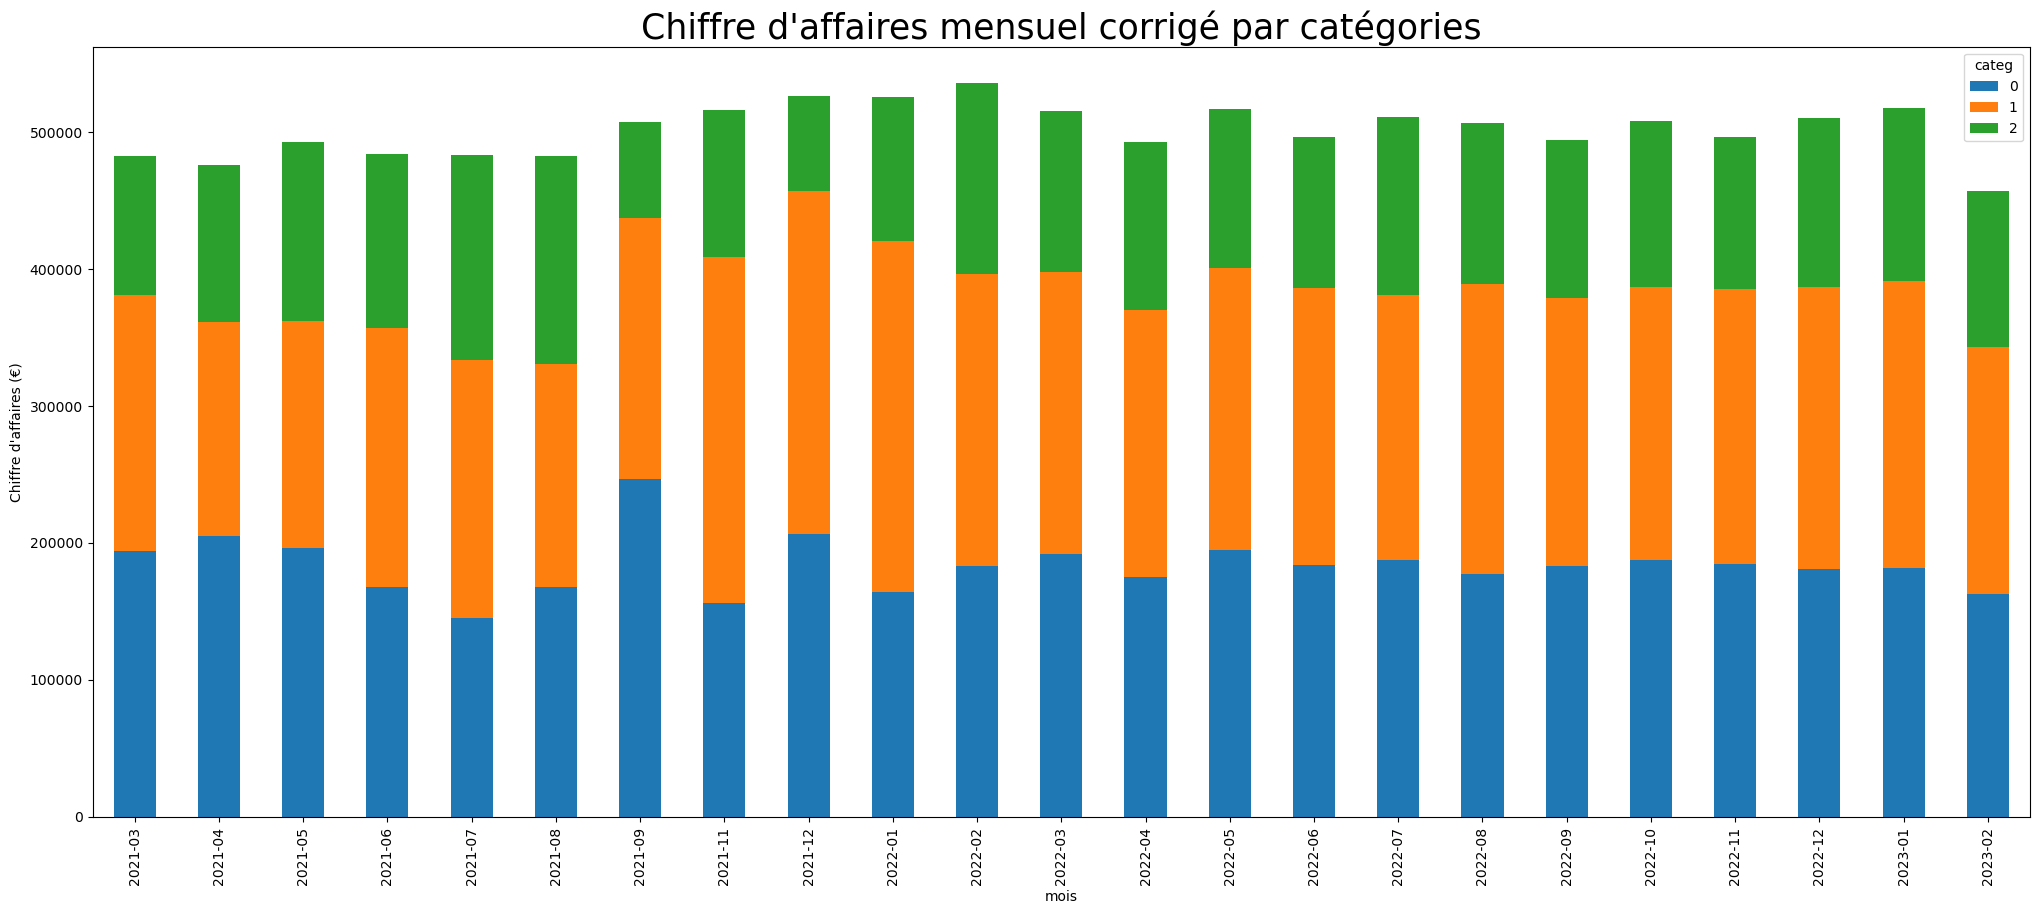

In [37]:
# Retirer le mois d'octobre 2021 des données
df_final_corrige = df_final[df_final['mois'].str.contains('2021-10')==False]

# Refaire la pivot table avec les nouvelles données
df_grouped_corrige  = df_final_corrige.groupby(['mois', 'categ'])['price'].sum().reset_index()

df_pivot_corrige = df_grouped_corrige.pivot(index=['mois'], columns='categ', values='price')

# Réafficher le graphique 
df_pivot_corrige.plot.bar(y=[0, 1, 2], stacked=True, figsize=(25,10))

plt.title("Chiffre d'affaires mensuel corrigé par catégories", fontsize=25)
plt.ylabel("Chiffre d'affaires (€)")

plt.show()

#### CA Journalier par Catégorie 

In [38]:
# Création d'un dataframe des ventes par jour ('date')
df_ca_journalier = df_final_corrige.groupby(['date','categ'])['price'].sum().reset_index()

df_journalier_pivot = df_ca_journalier.pivot(index=['date'], columns='categ', values='price')

df_journalier_pivot.head()

categ,0,1,2
date,,,
2021-03-01,6262.65,6811.53,3491.04
2021-03-02,6718.27,5627.15,3141.03
2021-03-03,6121.03,5691.41,3386.25
2021-03-04,5891.48,6098.98,3205.61
2021-03-05,5975.97,7071.21,4424.19


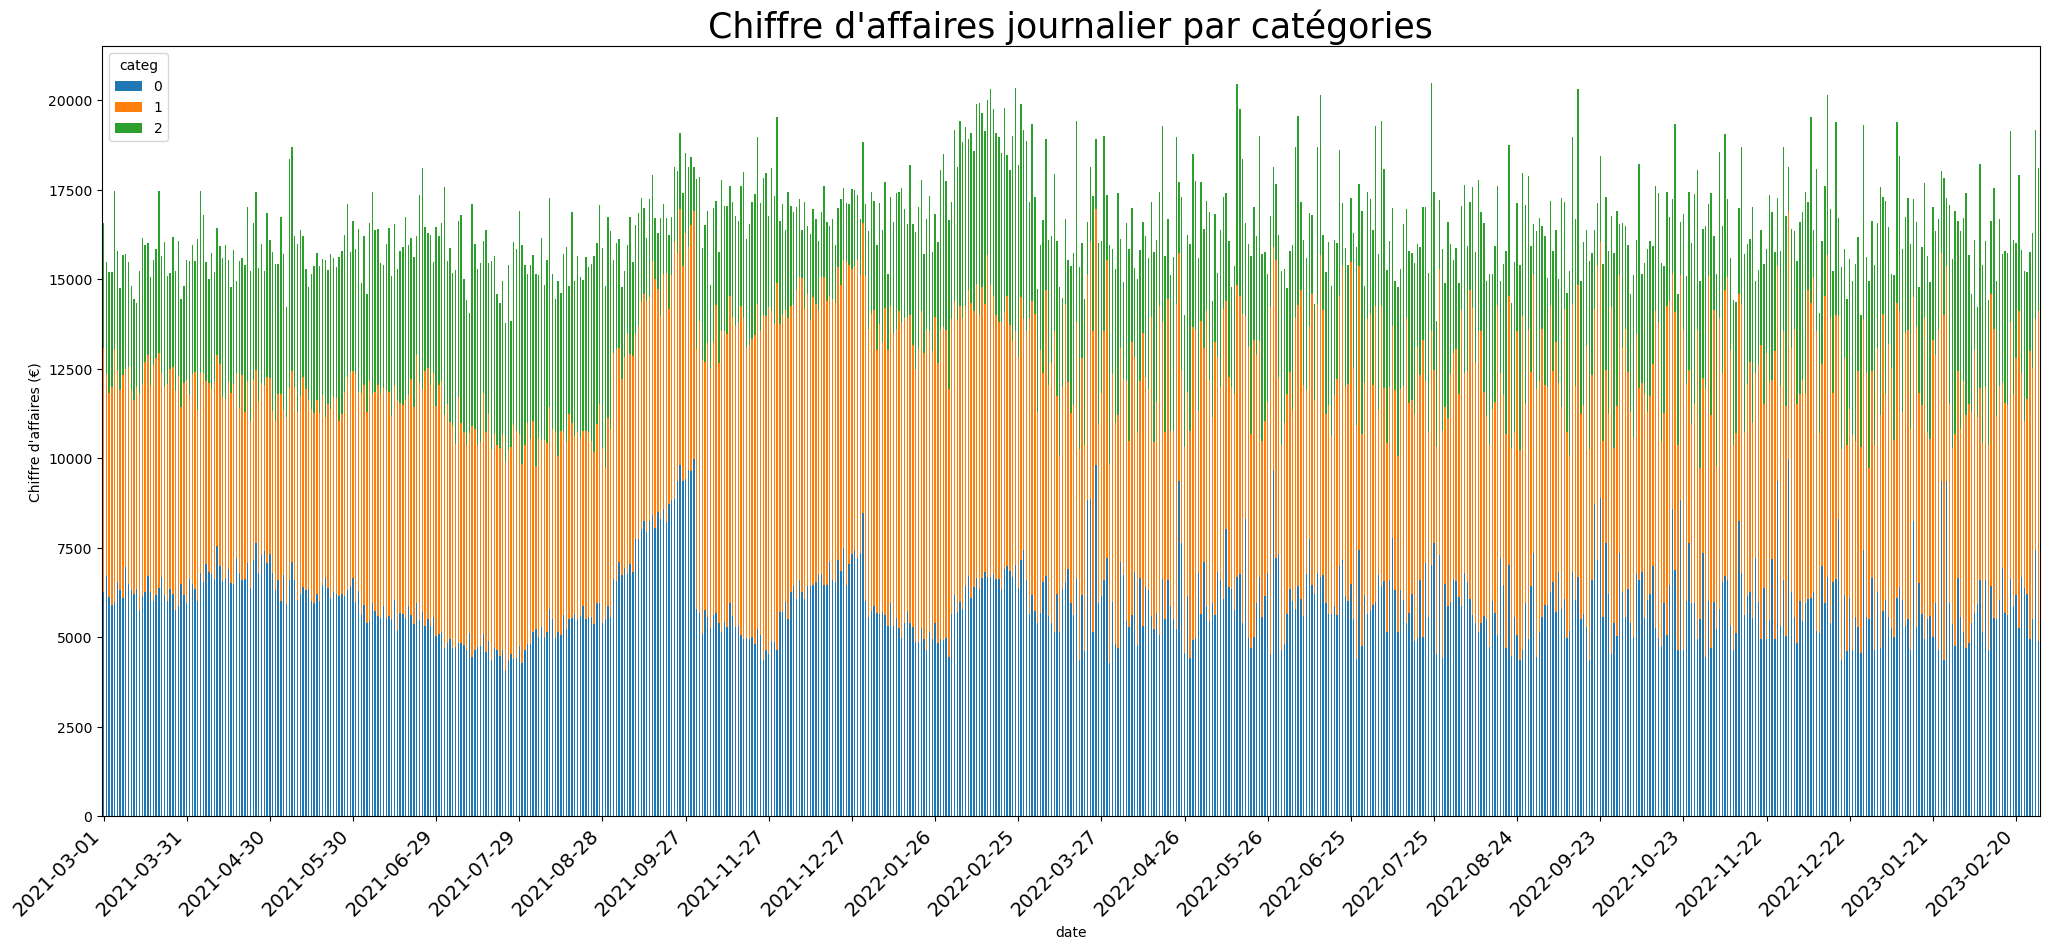

In [39]:
# Afficher le graphique 
n = 30 # display every 10th date
x_ticks = np.arange(0, len(df_journalier_pivot.index), n)
x_labels = df_journalier_pivot.index[x_ticks]

df_journalier_pivot.plot.bar(y=[0, 1, 2], stacked=True, figsize=(25,10))
plt.xticks(x_ticks, x_labels, rotation=45, ha="right", fontsize=14)
plt.title("Chiffre d'affaires journalier par catégories", fontsize=25)
plt.ylabel("Chiffre d'affaires (€)")

plt.show()

#### Evolution du nombre de ventes par catégorie

In [40]:
# Création d'un dataframe avec le nombre de ventes par mois
df_nombre_mensuel  = df_final_corrige.groupby(['mois', 'categ'])['price'].count().reset_index()

df_mensuel_pivot = df_nombre_mensuel.pivot(index=['mois'], columns='categ', values='price')

df_mensuel_pivot.head()

categ,0,1,2
mois,,,
2021-03,18131,9134,1336
2021-04,19342,7579,1522
2021-05,18501,8107,1677
2021-06,15898,9264,1688
2021-07,13578,9169,1991


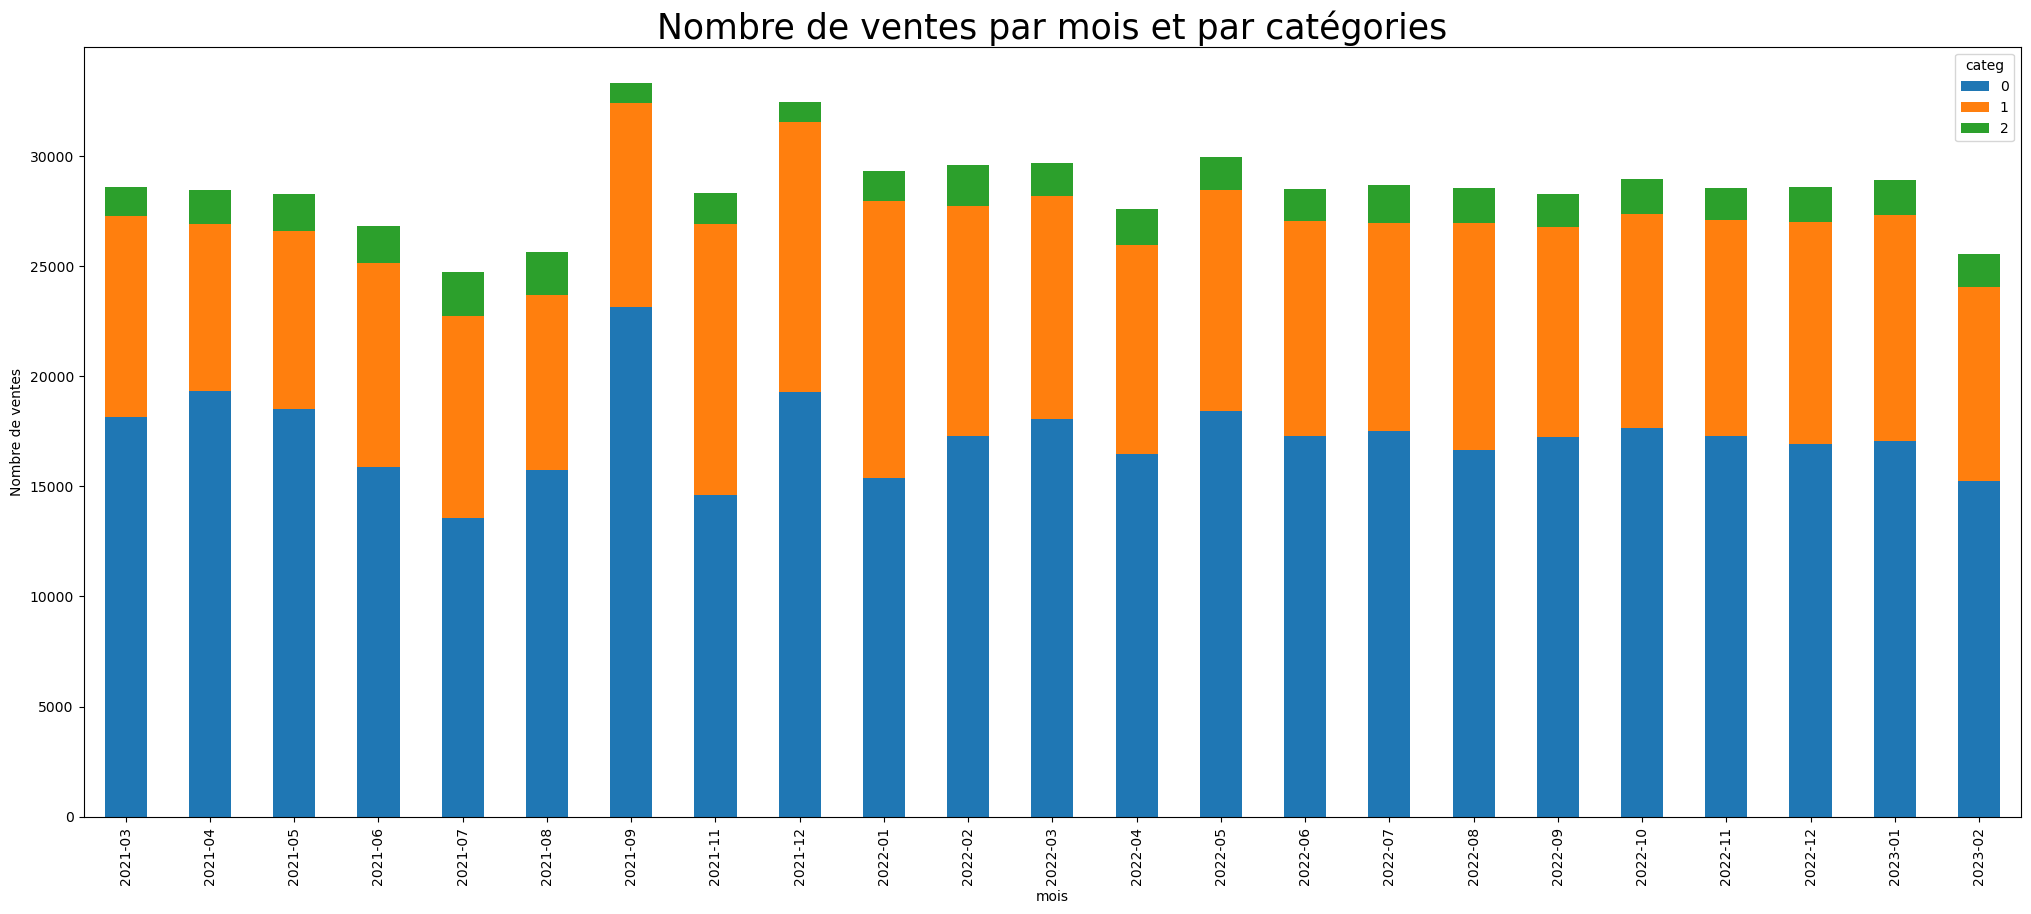

In [41]:
# Réafficher le graphique 
df_mensuel_pivot.plot.bar(y=[0, 1, 2], stacked=True, figsize=(25,10))

plt.title("Nombre de ventes par mois et par catégories", fontsize=25)
plt.ylabel("Nombre de ventes")

plt.show()

On constate qu'en termes de nombre de ventes, la catégorie 2 (vert) est représente une par moindre. Par comparaison avec le CA cela peut s'expliquer par des prix des produits plus élevés.

### Décomposition en moyenne mobile sur 30 jours

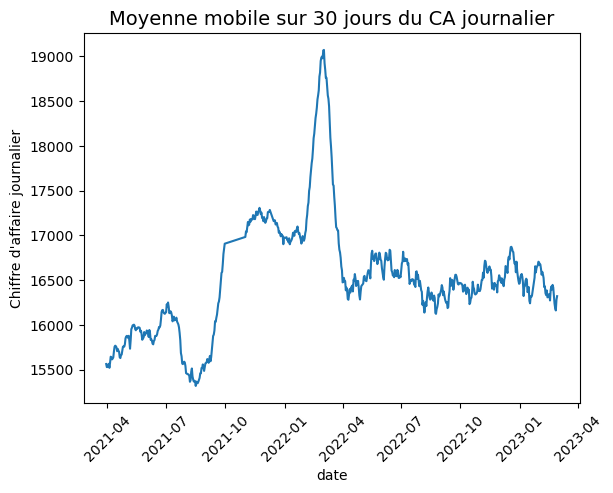

In [42]:
# Calculer de la moyenne mobile sur 30 jours
df_journalier = df_final_corrige.groupby('date')['price'].sum()

df_journalier.rolling(30).mean().plot.line(y="price", ylabel="Chiffre d'affaire journalier")

plt.title("Moyenne mobile sur 30 jours du CA journalier", fontsize=14)
plt.xticks(rotation=45)

plt.show()

La décomposition en **moyenne mobile** laisse apparaître les **tendances suivantes** : 
- Un belle croissance sur 2021 et début 2022
- Un pic en mars-avril 2022
- Depuis avril 2022 la tendance est stagnante autour de 16,500€ de CA par jour. 

## Zoom sur les références 

### Tops et Flops

In [43]:
# Grouper le nombre de ventes par référence
ca_references_count = df_final_corrige.groupby('id_prod')['price'].count().reset_index(name='Nombre de ventes du Produit')

ca_references_count.head()

,id_prod,Nombre de ventes du Produit
0,0_0,1194
1,0_1,469
2,0_10,18
3,0_100,3
4,0_1000,408


In [44]:
# Même chose mais par chiffre d'affaire (méthode sum() et non count())
ca_references_price = df_final_corrige.groupby('id_prod')['price'].sum().reset_index(name='CA du Produit')

ca_references_price.head()

,id_prod,CA du Produit
0,0_0,4477.50
1,0_1,5154.31
2,0_10,323.10
3,0_100,61.80
4,0_1000,2790.72


#### Tops des Références

In [45]:
# Afficher les tops par référence en nombres de ventes
ca_references_top_count = ca_references_count.sort_values(['Nombre de ventes du Produit'], ascending = False)

ca_references_top_count.head()

,id_prod,Nombre de ventes du Produit
2589,1_369,2237
2642,1_417,2173
2639,1_414,2166
2731,1_498,2117
2651,1_425,2084


In [46]:
# Afficher les tops par référence en CA
ca_references_top_price = ca_references_price.sort_values(['CA du Produit'], ascending = False)

ca_references_top_price.head()

,id_prod,CA du Produit
3094,2_159,92265.68
3068,2_135,67403.23
3043,2_112,62840.10
3032,2_102,58962.58
3150,2_209,55362.09


#### Flops des Références

In [47]:
# Afficher les flops par référence
ca_references_flop_count = ca_references_count.sort_values(['Nombre de ventes du Produit','id_prod'], ascending = True)

ca_references_flop_count.head()

,id_prod,Nombre de ventes du Produit
166,0_1151,1
313,0_1284,1
548,0_1498,1
588,0_1533,1
594,0_1539,1


In [48]:
# Afficher les flops par CA
ca_references_top_price = ca_references_price.sort_values(['CA du Produit'], ascending = True)

ca_references_top_price.head()

,id_prod,CA du Produit
594,0_1539,0.99
2177,0_898,1.27
313,0_1284,1.38
1895,0_643,1.98
718,0_1653,1.98


### Répartition par catégories

#### CA Total par catégorie

In [49]:
# Calculer la répartition du CA par catégorie
ca_par_categ = df_final.groupby('categ')['price'].sum().reset_index(name='CA par Catégorie')

ca_par_categ

,categ,CA par Catégorie
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


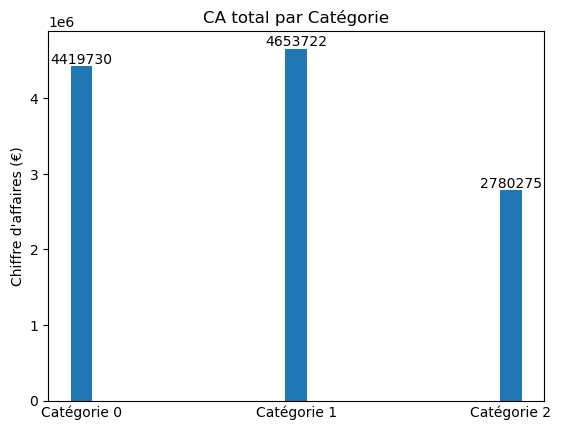

In [50]:
# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots()

# Créer un barplot
bar_plot = ax.bar(height=ca_par_categ['CA par Catégorie'], x=ca_par_categ['categ'], width = 0.1)

# Axes et labels
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(width=0)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'])
ax.set_title('CA total par Catégorie')
ax.set_ylabel('Chiffre d\'affaires (€)')

# Ajouter les valeurs des barres au-dessus de chaque barre
for i, bar in enumerate(bar_plot):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, str(int(ca_par_categ['CA par Catégorie'][i])), ha='center', va='bottom')


# Afficher le graphique
plt.show()

#### Top et Flops par catégorie

In [51]:
# Calculer le CA par produit, en gardant la colonne catégorie
df_top_flop_categ = df_final_corrige.groupby(['id_prod', 'categ']).agg({'price': 'sum'}).reset_index()

df_top_flop_categ

,id_prod,categ,price
0,0_0,0,4477.50
1,0_1,0,5154.31
2,0_10,0,323.10
3,0_100,0,61.80
4,0_1000,0,2790.72
...,...,...,...
3258,2_95,2,395.96
3259,2_96,2,27835.71
3260,2_97,2,2092.87
3261,2_98,2,149.74


In [52]:
# Top par catégorie
top_performing = df_top_flop_categ.groupby('categ').apply(lambda x: x.nlargest(3, 'price')).reset_index(drop=True)

# Flop par catégorie
bottom_performing = df_top_flop_categ.groupby('categ').apply(lambda x: x.nsmallest(3, 'price')).reset_index(drop=True)

In [53]:
display(top_performing)

,id_prod,categ,price
0,0_1441,0,22389.21
1,0_1421,0,21809.09
2,0_1414,0,21395.52
3,1_395,1,53950.39
4,1_369,1,53665.63
5,1_414,1,51615.78
6,2_159,2,92265.68
7,2_135,2,67403.23
8,2_112,2,62840.10


In [54]:
display(bottom_performing)

,id_prod,categ,price
0,0_1539,0,0.99
1,0_898,0,1.27
2,0_1284,0,1.38
3,1_420,1,14.24
4,1_224,1,19.80
5,1_470,1,21.64
6,2_81,2,86.99
7,2_23,2,115.99
8,2_98,2,149.74


#### Recherche de pattern en fonction des jours de la semaine

In [55]:
# On se base sur le DF du CA journalier sans les catégories
df_journalier_temp = df_ca_journalier.reset_index()

df_journalier_temp.head()

,index,date,categ,price
0,0,2021-03-01,0,6262.65
1,1,2021-03-01,1,6811.53
2,2,2021-03-01,2,3491.04
3,3,2021-03-02,0,6718.27
4,4,2021-03-02,1,5627.15


In [56]:
# Ajouter une colonne jour de la semaine dans le dataframe du CA par jour
df_journalier_temp['date'] = pd.to_datetime(df_journalier_temp['date'])

df_journalier_temp['jour'] = df_journalier_temp['date'].dt.dayofweek

df_journalier_temp.head()

,index,date,categ,price,jour
0,0,2021-03-01,0,6262.65,0
1,1,2021-03-01,1,6811.53,0
2,2,2021-03-01,2,3491.04,0
3,3,2021-03-02,0,6718.27,1
4,4,2021-03-02,1,5627.15,1


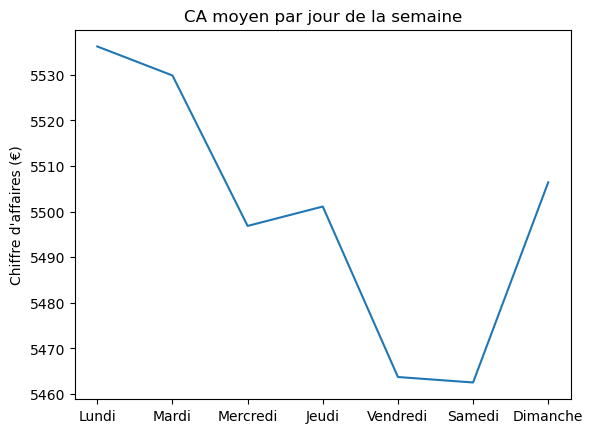

In [57]:
# Calculer la moyenne pour chaque jour de la semaine
ca_jour_moyen = df_journalier_temp.groupby('jour')['price'].mean()

# Créer un mapping pour afficher le nom du jour au lieu de l'integer correspondant
jour_semaine = {0: 'Lundi', 1: 'Mardi', 2: 'Mercredi', 3: 'Jeudi', 4: 'Vendredi', 5: 'Samedi', 6: 'Dimanche'}

# Remplacer chaque integer par son nom dans le label
labels = [jour_semaine[i] for i in ca_jour_moyen.index]

# Afficher le graphique
plt.plot(labels, ca_jour_moyen)
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('CA moyen par jour de la semaine')
plt.show()

On observe que le **CA moyen est plus élevé le lundi, le mardi et le dimanche**, tandis que **vendredi et samedi sont les moins bonnes journées** en moyenne. 

***

## Répartition du CA selon les profils de clients

### Informations sur les profils des clients

#### Répartition des clients par le genre

In [58]:
# Répartition des clients par le genre
df_genre = df_final.groupby('sex')['client_id'].count().rename("Nombre d'individus")

df_genre = df_genre.reset_index()

df_genre


,sex,Nombre d'individus
0,f,338285
1,m,340826


In [59]:
# Calculer les proportions
proportion_femme = df_genre.loc[df_genre['sex'] == 'f', "Nombre d'individus"].values[0] / df_genre["Nombre d'individus"].sum()

proportion_homme = 1 - proportion_femme

print("Proportion de femmes : {:.2f}%".format(proportion_femme*100))
print("Proportion d'hommes : {:.2f}%".format(proportion_homme*100))

Proportion de femmes : 49.81%
Proportion d'hommes : 50.19%


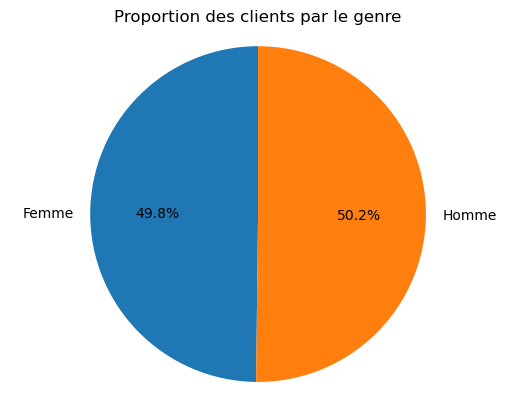

In [60]:
# Afficher dans un piechart
df_proportion_hf = pd.DataFrame({'value': [proportion_femme, proportion_homme]}, index=['Femme', 'Homme'])

# Créer une figure et des axes
fig, ax = plt.subplots()

# Affecter les valeurs
ax.pie(df_proportion_hf['value'], labels = df_proportion_hf.index, autopct='%1.1f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Proportion des clients par le genre')

plt.show()

#### Répartition des clients par l'âge

In [61]:
# Ajouter une colonne age
df_final_corrige.loc[:, 'age'] = 2023 - df_final_corrige['birth'].astype(int)

df_final_corrige.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_6108\3497072822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_corrige.loc[:, 'age'] = 2023 - df_final_corrige['birth'].astype(int)


,client_id,sex,birth,id_prod,date,session_id,price,categ,mois,annee,time,CA_cumule,age
0,c_4410,f,1967.0,0_1316,2021-12-29,s_141762,7.2,0,2021-12,2021,09:11:18.860592,7.2,56
1,c_4410,f,1967.0,0_1316,2022-03-29,s_186233,7.2,0,2022-03,2022,09:11:18.860592,14.4,56
2,c_4410,f,1967.0,0_1316,2022-05-29,s_215758,7.2,0,2022-05,2022,09:11:18.860592,21.6,56
3,c_3654,f,1978.0,0_1316,2021-11-26,s_125143,7.2,0,2021-11,2021,03:51:34.068872,28.8,45
4,c_3654,f,1978.0,0_1316,2022-08-26,s_258546,7.2,0,2022-08,2022,03:51:34.068872,36.0,45


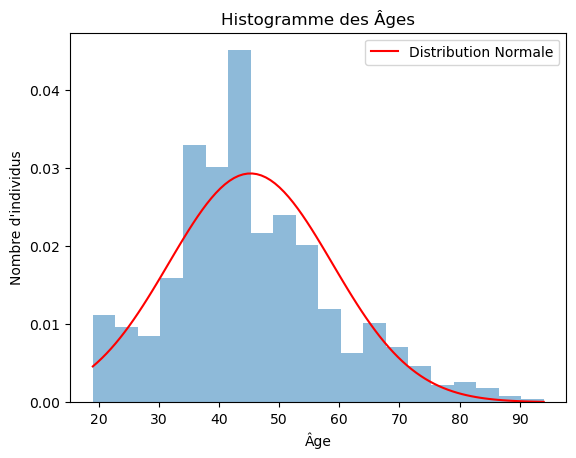

In [62]:
# Calculer le nombre de classes avec la règle de Sturges
n = len(df_final_corrige['age'])
k = 1 + math.log2(n)
bins = int(k)

# Afficher l'histogramme

plt.hist(df_final_corrige['age'], bins=bins, density=True, alpha=0.5)

# Ajouter la courbe de la distribution normale
mean_age = df_final_corrige['age'].mean()
std_age = df_final_corrige['age'].std()
x = np.linspace(df_final_corrige['age'].min(), df_final_corrige['age'].max(), 100)
y = st.norm.pdf(x, mean_age, std_age)
plt.plot(x, y, 'r-', label='Distribution Normale')

# Ajouter labels et titre
plt.xlabel('Âge')
plt.ylabel("Nombre d'individus")
plt.title('Histogramme des Âges')
plt.legend()

plt.show()

### Courbe de Lorenz : Répartition du CA entre les clients

In [63]:
# Création d'un dataframe du CA généré par client

df_ca_par_client = df_final_corrige.groupby(['client_id', 'age'])['price'].sum().reset_index(name='montant_total')

df_ca_par_client.head()

,client_id,age,montant_total
0,c_1,68,550.19
1,c_10,67,1353.60
2,c_100,31,254.85
3,c_1000,57,2209.92
4,c_1001,41,1720.08


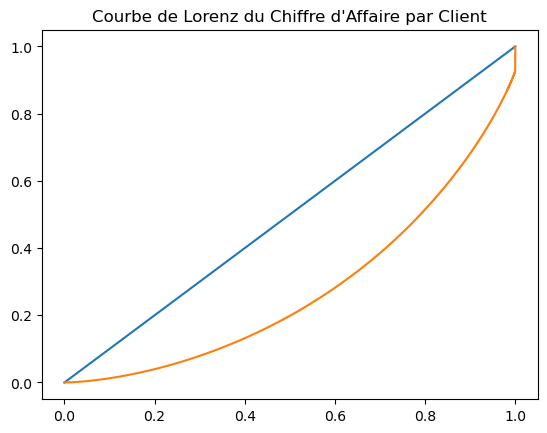

In [64]:
# Créer une liste avec les CA par client
ca_par_client = df_ca_par_client['montant_total']

# Trier par CA par client (croissant) et diviser par la population
lorenz = np.cumsum(np.sort(ca_par_client)) / ca_par_client.sum()
lorenz = np.append([0],lorenz)

# Créer l'axe x 
n = len(ca_par_client)
xaxis  = np.linspace(0-1/n,1+1/n,n+1) 

# Ajouter la courbe de référence x=y
plt.plot([0, 1], [0, 1], label='Référence')


# Afficher la courbe de lorenz
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz du Chiffre d'Affaire par Client")


plt.show()

#### Calculer l'indice de Gini

In [65]:
# Calculer l'indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S

print("Indice de Gini :",gini)

Indice de Gini : 0.4473981709680278


#### Afficher la médiale

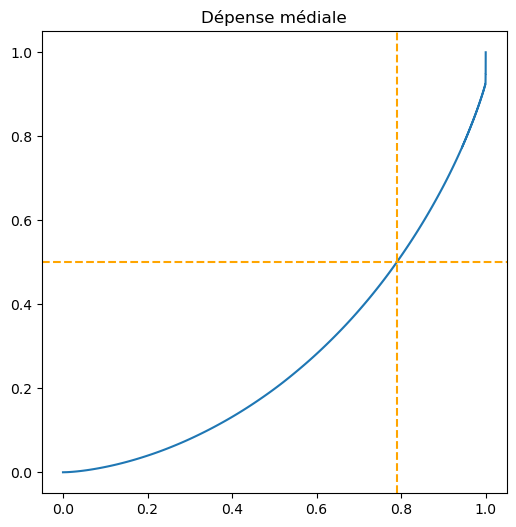

In [66]:
# Trouver le seuil de 50% du CA
half_ca = ca_par_client.sum() / 2

# Trouver l'index du point auquel la moitié du CA est atteint
half_index = np.argmax(np.cumsum(np.sort(ca_par_client)) >= half_ca)

# Calculer les coordonnées de ce point
half_x = xaxis[half_index]
half_y = lorenz[half_index]

# Afficher la courbe de lorenz avec la ligne de la médiale
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(xaxis,lorenz,drawstyle='steps-post')
ax.axhline(y=half_y, color='orange', linestyle='--')
ax.axvline(x=half_x, color='orange', linestyle='--')
ax.set_title("Dépense médiale")

plt.show()

L'individu possédant les dépenses médiale est proche de 0.8. 

Dit autrement, **20% des clients représentent près de 50% du chiffre d'affaire**.

### Identification et analyse des plus gros clients

In [67]:
# Ajouter la colonne 'nombre d'achat'
df_ca_par_client['nombre_achat'] = df_final_corrige.groupby('client_id')['price'].count().to_list()

df_ca_par_client

,client_id,age,montant_total,nombre_achat
0,c_1,68,550.19,38
1,c_10,67,1353.60,58
2,c_100,31,254.85,8
3,c_1000,57,2209.92,122
4,c_1001,41,1720.08,96
...,...,...,...,...
8593,c_995,68,189.41,14
8594,c_996,53,1611.59,94
8595,c_997,29,1432.02,58
8596,c_998,22,2779.88,53


In [68]:
# Trier par CA par client
df_client_sorted = df_ca_par_client.sort_values(by='montant_total', ascending=False)

df_client_sorted.head()

,client_id,age,montant_total,nombre_achat
677,c_1609,43,312755.08,24472
4387,c_4958,24,282654.61,5090
6336,c_6714,55,149783.75,8897
2723,c_3454,54,111766.71,6632
2108,c_2899,29,5214.05,105


On remarque qu'on a **4 gros clients qui dépassent les 100.000€ d'achats** chacun tandis que le 5ème ne représente que 5.000€. 

In [69]:
# Trier les clients par nombre d'achat
df_client_sorted2 = df_ca_par_client.sort_values(by='nombre_achat', ascending=False)

df_client_sorted2.head()

,client_id,age,montant_total,nombre_achat
677,c_1609,43,312755.08,24472
6336,c_6714,55,149783.75,8897
2723,c_3454,54,111766.71,6632
4387,c_4958,24,282654.61,5090
2513,c_3263,38,5129.89,392


On retrouve les mêmes 4 clients en fonction du nombre d'achats effectués.

### Préparation du dataframe pour la partie 3

Il convient d'exclure les clients outliers afin de ne pas fausser l'analyse statistique en Partie 3.

In [70]:
# Exclure les outliers
client_outliers = ['c_1609', 'c_6714', 'c_3454', 'c_4958']

mask = ~df_final_corrige['client_id'].isin(client_outliers)

df_clients_final = df_final_corrige[mask]

df_clients_final.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,mois,annee,time,CA_cumule,age
0,c_4410,f,1967.0,0_1316,2021-12-29,s_141762,7.2,0,2021-12,2021,09:11:18.860592,7.2,56
1,c_4410,f,1967.0,0_1316,2022-03-29,s_186233,7.2,0,2022-03,2022,09:11:18.860592,14.4,56
2,c_4410,f,1967.0,0_1316,2022-05-29,s_215758,7.2,0,2022-05,2022,09:11:18.860592,21.6,56
3,c_3654,f,1978.0,0_1316,2021-11-26,s_125143,7.2,0,2021-11,2021,03:51:34.068872,28.8,45
4,c_3654,f,1978.0,0_1316,2022-08-26,s_258546,7.2,0,2022-08,2022,03:51:34.068872,36.0,45


In [71]:
# Ajouter la colonne panier_moyen au df_ca_par_client
df_ca_par_client['panier_moyen'] = df_final_corrige.groupby('client_id')['price'].mean().to_list()

df_ca_par_client

,client_id,age,montant_total,nombre_achat,panier_moyen
0,c_1,68,550.19,38,14.478684
1,c_10,67,1353.60,58,23.337931
2,c_100,31,254.85,8,31.856250
3,c_1000,57,2209.92,122,18.114098
4,c_1001,41,1720.08,96,17.917500
...,...,...,...,...,...
8593,c_995,68,189.41,14,13.529286
8594,c_996,53,1611.59,94,17.144574
8595,c_997,29,1432.02,58,24.690000
8596,c_998,22,2779.88,53,52.450566


In [72]:
# Exclure les outliers du df_ca_par_client
mask2 = ~df_ca_par_client['client_id'].isin(client_outliers)

df_clients_sans_outliers = df_ca_par_client[mask2]

df_clients_sans_outliers.head()

,client_id,age,montant_total,nombre_achat,panier_moyen
0,c_1,68,550.19,38,14.478684
1,c_10,67,1353.60,58,23.337931
2,c_100,31,254.85,8,31.856250
3,c_1000,57,2209.92,122,18.114098
4,c_1001,41,1720.08,96,17.917500


***

***

# Analyse bivariée des corrélations entre les données clients pour Julie

## Corrélation entre le genre d'un client et la catégorie de livres achetés

On est dans la situation où l'on cherche à analyser la corrélation entre **deux variables qualitatives** (genre et catégorie de livre).

On va donc privilégier une représentation en **tableau de contigence** puis de **heatmap**. 

### Hypothèse H0 : Les variables ne sont pas liées

S'agissant de **deux variables qualitatives** le test adapté est **le test de Chi2**.

In [73]:
from scipy.stats import chi2_contingency
chiVal, pVal, df, exp = chi2_contingency(pd.crosstab(df_clients_final["sex"],df_clients_final["categ"]))

print("P-Value = ", pVal)

P-Value =  8.48311292992366e-05


Le test de chi2 retourne une **p-value largement inférieure à 5%**.

Il n'y a donc que très peu de chance que les variables ne soient pas liées. 

**On peut donc rejeter l'hypothèse H0.** 

### Hypothèse H1 : Il existe une corrélation entre le genre et la catégorie préférée

#### Tableaux de contigence et de contribution à la non indépendance

In [74]:
# Création d'un DataFrame du nombre d'achat par catégorie et par client 
df_sex_categ = df_clients_final.groupby(['categ','sex'])['categ'].count().reset_index(name='count')

df_sex_categ

,categ,sex,count
0,0,f,191919
1,0,m,177945
2,1,f,110550
3,1,m,100227
4,2,f,16429
5,2,m,15351


In [75]:
# Utiliser la méthode pivot_table pour mettre en forme de tableau de contigence
df_sex_categ_pivoted = df_sex_categ.pivot_table(index=['sex'], columns='categ', values='count', aggfunc='sum', margins=True, margins_name='Total')

display(df_sex_categ_pivoted)

categ,0,1,2,Total
sex,,,,
f,191919,110550,16429,318898
m,177945,100227,15351,293523
Total,369864,210777,31780,612421


In [76]:
# Créer le tableau de répartition théorique en cas d'indépendance
tx = df_sex_categ_pivoted.loc[:,["Total"]]
ty = df_sex_categ_pivoted.loc[["Total"],:]
n = len(df_clients_final['sex'])
df_indep = tx.dot(ty) / n

df_indep

categ,0,1,2,Total
sex,,,,
f,192594.456872,109755.15821,16548.384918,318898.0
m,177269.543128,101021.84179,15231.615082,293523.0
Total,369864.000000,210777.00000,31780.000000,612421.0


Il s'agit des chiffres que l'on trouverait dans un cas théorique ou il n'y aucune corrélation (le cas d'indépendance) entre le sexe d'une personne et sa catégorie de livre préférée.

Calculons maintenant la **mesure de contribution à la non indépendance grâce au coeficient de chi2**

In [77]:
# Créer le tableau de mesure de contribution à la non indépendance avec la méthode du chi-2

mesure = (df_sex_categ_pivoted-df_indep)**2/df_indep
xi_n = mesure.sum().sum()
table = mesure/xi_n

table

categ,0,1,2,Total
sex,,,,
f,0.126345,0.307003,0.045936,0.0
m,0.137267,0.333543,0.049907,0.0
Total,0.000000,0.000000,0.000000,0.0


On obtient des coefficients élevés et un p-value faible car notre échantillon est très large. 

Toutefois on remarque que par rapport au cas théorique : 
- Les femmes ont achetés 110550 livres de catégorie 1 contre 109755 théorique
- Les hommes ont achetés 177945 livres de catégorie 0 contre 177269 dans le cas théorique. 

Ces différences au vu de la taille de l'échantillon ne peuvent pas être considérées comme significative. 

**On ne peut donc pas établir de relation de corrélation entre le genre de l'individu et la catégorie de livre qu'il préfère.**

***

## Corrélations basées sur l'âge des clients

### Âge et Catégorie de Livres

Hypothèse H0 : La catégorie d'âge et la catégorie de livres préférés sont indépendantes

Hypothèse H1 : La catégorie de livre et l'âge sont corrélés

#### Version 1 : Par ANOVA

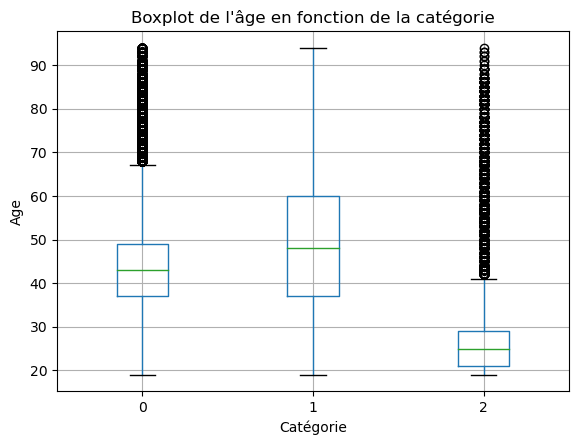

In [81]:
df_clients_final.boxplot('age', by='categ')

plt.xlabel('Catégorie')
plt.ylabel('Age')
plt.title("Boxplot de l'âge en fonction de la catégorie")
plt.suptitle("") # Retirer le titre automatique
plt.show()

Il semblerait que : 
   - Les jeunes préfèrent la catégorie 2
   - Les 35-50 ans préfèrent la catégorie 0
   - La catégorie 1 plaise à tous les âges (la dispersion couvre tout l'échantillon d'âge)
   
Vérifions si cette première analyse se vérifie mathématiquement par ANOVA. 

In [82]:
# Test par ANOVA sur les catégories et le panier moyen

from scipy.stats import f_oneway

categ0 = df_clients_final[df_clients_final['categ'] == 0]['age']
categ1 = df_clients_final[df_clients_final['categ'] == 1]['age']
categ2 = df_clients_final[df_clients_final['categ'] == 2]['age']

stat, p_value = f_oneway(categ0, categ1, categ2)
print('Statistique de test :', stat)
print('P-valeur :', p_value)

Statistique de test : 39069.56403322692
P-valeur : 0.0


La P-Value étant **très largement inférieure à 0.05**, nous pouvons rejeter l'hypothèse nulle. 

Il y a bien une **différence significative selon les catégories de livre** concernant l'âge du client l'ayant acheté.

#### Version 2 : Approche par catégorie d'âge (discrétisation)

In [83]:
# Création d'un DataFrame du nombre d'achat par catégorie et par âge
df_age_categ = df_clients_final.groupby(['categ','age'])['categ'].count().reset_index(name='count')

# Utiliser la méthode pivot_table 
df_age_categ_pivoted = df_age_categ.pivot_table(index=['age'], columns='categ', values='count')

df_age_categ_pivoted.head()

categ,0,1,2
age,,,
19,3283,5671,5815
20,850,1662,1726
21,967,1716,1782
22,941,1544,1676
23,1051,1616,1630


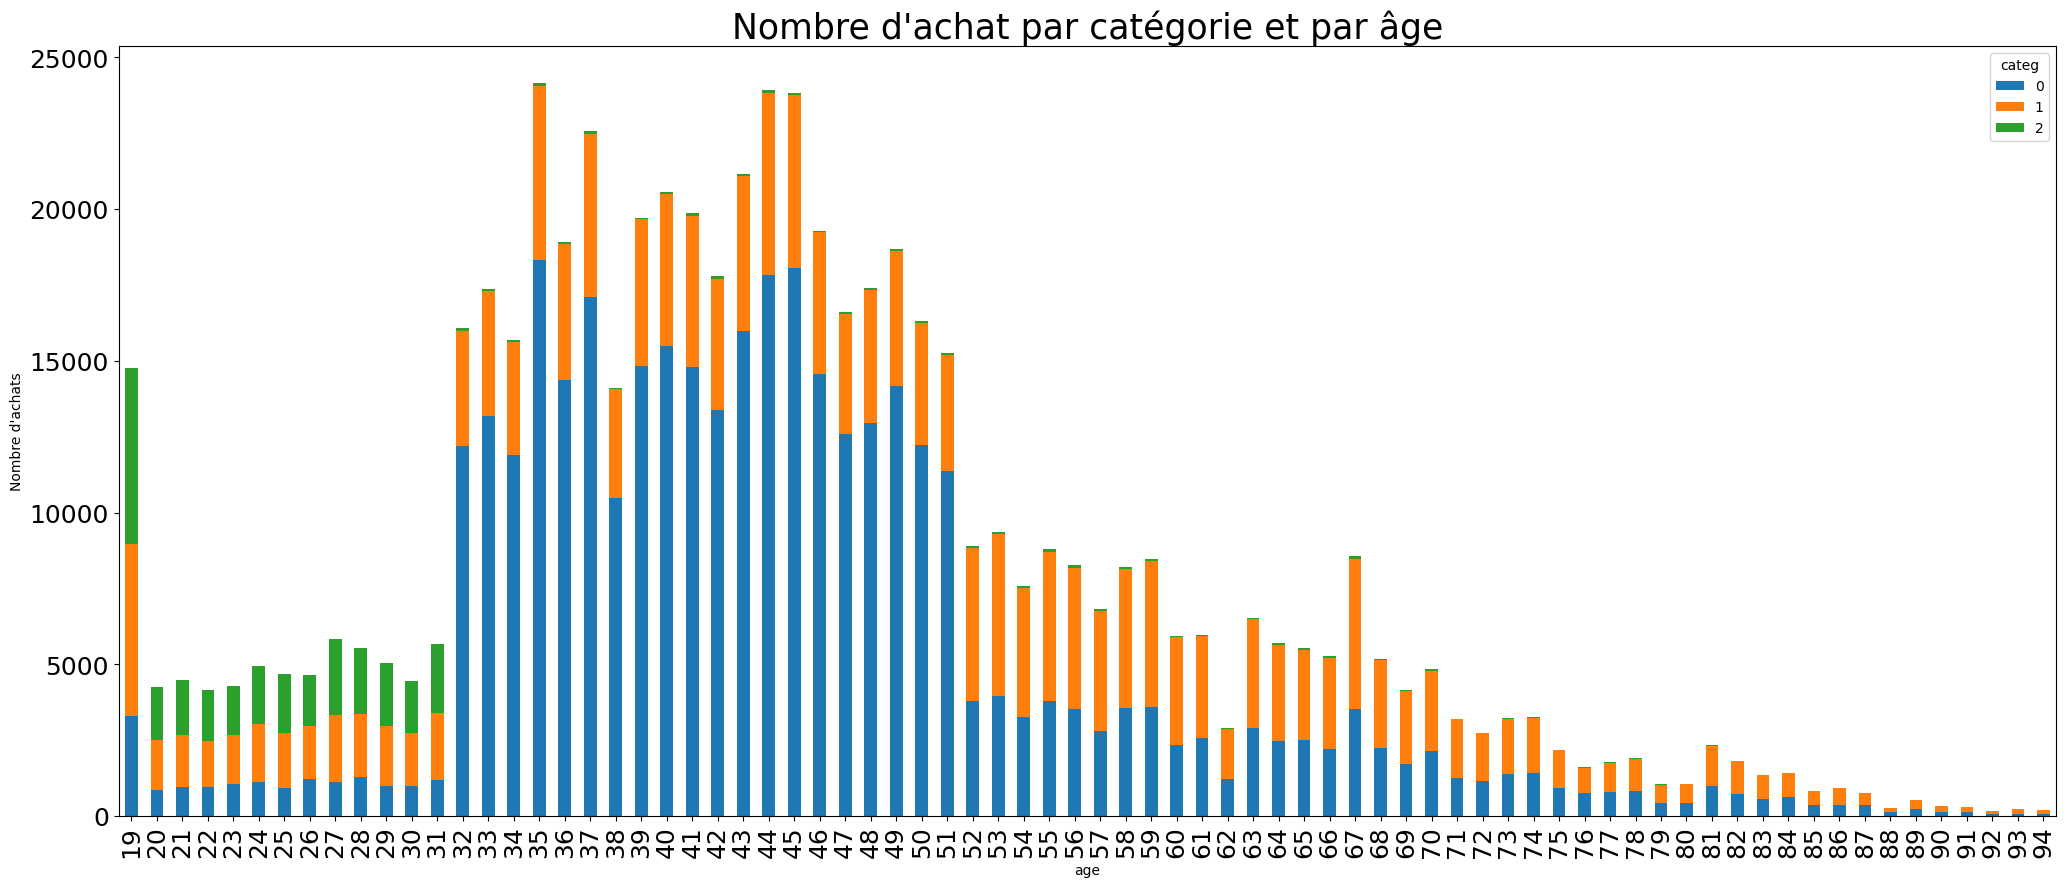

In [84]:
# Afficher les données sous forme d'un graphique en barres empilées
df_age_categ_pivoted.plot.bar(y=[0, 1, 2], stacked=True, figsize=(25,10), fontsize=18)

plt.title("Nombre d'achat par catégorie et par âge", fontsize=25)
plt.ylabel('Nombre d\'achats')

plt.show()

Il semble se dégager plusieurs catégories : 
- Les - de 30 ans
- Les 30-50 (que l'on peut diviser en 2 catégorie 30-40 et 40-50 pour lisser les effectifs)
- Les 50-70
- Les plus de 70

Notons qu'avec cette répartition nos introduisons un biais important, mais il facilite la lecture

In [85]:
# Créer les catégories d'âge
bins = [0, 30, 40, 50, 70, float('inf')]

# Donner un nom à chaque catégorie
labels = ['Moins de 30', '30-40', '40-50', '50-70', '70+']

df_age_categ = df_age_categ.sort_values(by='age', ascending = True)

# Ajouter un colonne avec le groupe d'âge

df_age_categ['groupe_age'] = pd.cut(df_age_categ['age'], bins=bins, labels=labels)

df_age_categ.head()

,categ,age,count,groupe_age
0,0,19,3283,Moins de 30
76,1,19,5671,Moins de 30
152,2,19,5815,Moins de 30
1,0,20,850,Moins de 30
77,1,20,1662,Moins de 30


In [86]:
df_age_categ_grouped = df_age_categ.groupby(['categ', 'groupe_age'])['count'].sum().reset_index()

df_groupe_categ = df_age_categ_grouped.pivot_table(values='count', index='categ', columns='groupe_age')

df_groupe_categ

groupe_age,Moins de 30,30-40,40-50,50-70,70+
categ,,,,,
0,14723,129022,146538,65457,14124
1,25669,42925,47594,75618,18971
2,26645,2887,747,1212,289


In [87]:
chiVal, pVal, df, exp = chi2_contingency(df_groupe_categ)

chiVal, pVal, df, exp

(239140.45090054665,
 0.0,
 8,
 array([[ 40486.15734601, 105588.80668037, 117694.73361625,
          85932.45327642,  20161.84908094],
        [ 23072.13134265,  60172.63617348,  67071.52593232,
          48970.93175936,  11489.77479218],
        [  3478.71131134,   9072.55714615,  10112.74045142,
           7383.61496422,   1732.37612688]]))

In [88]:
print("P-Value = ", pVal)

P-Value =  0.0


La P-Value étant inférieure à 0.05, nous pouvons rejeter l'hypothèse nulle et conclure que la catégorie de livre préférés et la catégorie d'âge sont liés. 

In [89]:
# Créer le tableau de contribution à la non indépendance avec la méthode du chi2
observed = df_groupe_categ.values
expected = exp
mesure = ((observed - expected) ** 2) / expected
xi_n = np.sum(mesure)
table2 = mesure / xi_n

table2

array([[0.06855491, 0.02174663, 0.02955826, 0.02040125, 0.00756103],
       [0.00122225, 0.02067317, 0.02365246, 0.06063278, 0.02036952],
       [0.64512147, 0.01763498, 0.03627123, 0.02157126, 0.00502879]])

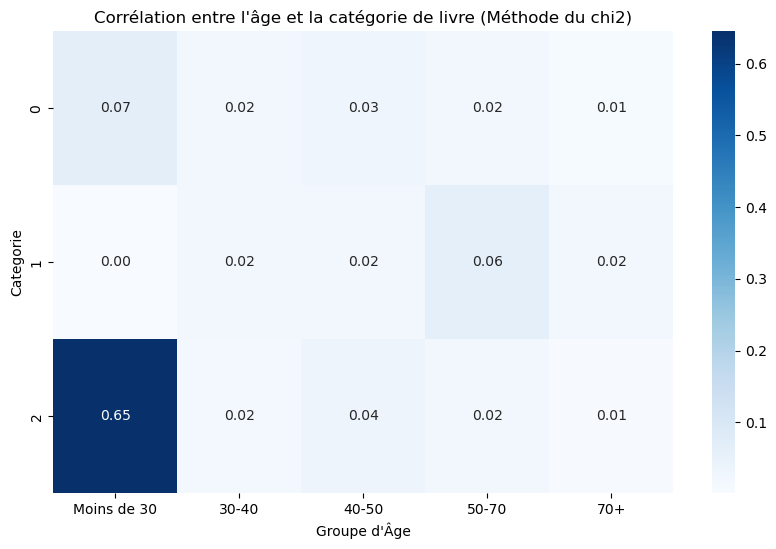

In [90]:
# Créer la heatmap
fig, ax = plt.subplots(figsize=(10,6))

age_labels = ['Moins de 30', '30-40', '40-50', '50-70', '70+']

sns.heatmap(table2, annot=True, fmt=".2f", cmap="Blues", ax=ax,  xticklabels=age_labels)

ax.set_title("Corrélation entre l'âge et la catégorie de livre (Méthode du chi2)")
ax.set_xlabel("Groupe d'Âge")
ax.set_ylabel("Categorie")

plt.show()

***

### Âge et Panier Moyen

In [91]:
df_clients_sans_outliers.head()

,client_id,age,montant_total,nombre_achat,panier_moyen
0,c_1,68,550.19,38,14.478684
1,c_10,67,1353.60,58,23.337931
2,c_100,31,254.85,8,31.856250
3,c_1000,57,2209.92,122,18.114098
4,c_1001,41,1720.08,96,17.917500


In [92]:
# Ajouter les catégories d'âge au df des CA et panier moyen par client
df_clients_sans_outliers = df_clients_sans_outliers.sort_values(by='age', ascending=True)

# Cut the age column and create a new column with the age group labels
df_clients_sans_outliers['groupe_age'] = pd.cut(df_clients_sans_outliers['age'], bins=bins, labels=labels)

df_clients_sans_outliers.head()

,client_id,age,montant_total,nombre_achat,panier_moyen,groupe_age
6826,c_7158,19,421.91,5,84.382000,Moins de 30
6284,c_6668,19,2992.76,72,41.566111,Moins de 30
4323,c_490,19,413.32,26,15.896923,Moins de 30
7783,c_802,19,2172.05,59,36.814407,Moins de 30
5759,c_6195,19,2230.00,89,25.056180,Moins de 30


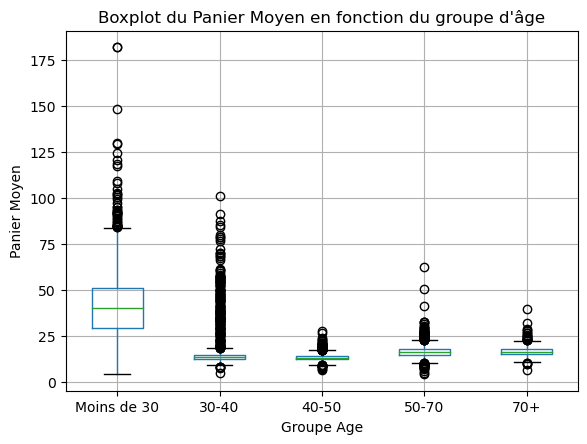

In [93]:
# Afficher le boxplot du panier_moyen
df_clients_sans_outliers.boxplot('panier_moyen', by='groupe_age')

plt.xlabel('Groupe Age')
plt.ylabel('Panier Moyen')
plt.title("Boxplot du Panier Moyen en fonction du groupe d'âge")
plt.suptitle("") # Retirer le titre automatique
plt.show()

#### Méthode par coefficient de Pearson

S'agissant de deux variables quantitatives, nous pouvons tester la corrélation avec le coeficient de Pearson. 

(Sans employer la discrétisation opérée en catégories d'âge, mais bien directement sur l'âge et le panier moyen)

In [94]:
pearson_coef = df_clients_sans_outliers['age'].corr(df_clients_sans_outliers['panier_moyen'], method='pearson')

print(pearson_coef)

-0.5089246008588765


On obtient bien la confirmation qu'il existe une corrélation négative entre l'âge et le panier moyen. 

Dit autrement, plus les clients sont âgés et moins ils ont un panier moyen élevé. 

#### Méthode par ANOVA

Réalisons cette fois une ANOVA en prenant en compte la discrétisation par catégorie d'âge.

In [95]:
# Test par ANOVA sur les catégories et le panier moyen

groupe1 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == 'Moins de 30']['panier_moyen']
groupe2 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '30-40']['panier_moyen']
groupe3 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '40-50']['panier_moyen']
groupe4 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '50-70']['panier_moyen']
groupe5 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '70+']['panier_moyen']

stat, p_value = f_oneway(groupe1, groupe2, groupe3, groupe4, groupe5)
print('Statistique de test :', stat)
print('P-valeur :', p_value)

Statistique de test : 2655.0991086378162
P-valeur : 0.0


La P-Valeur étant grandement inférieure à 0.05 on peut conclure à une différence significative entre les différents groupes d'âge concernant le panier moyen.

***

### Âge et Fréquence d'âchat

In [96]:
# Compter le nombre d'achat par client et par an

df_freq_age = df_clients_final.groupby(['client_id','annee', 'age'])['price'].count().reset_index(name='nb_achat')

In [97]:
# Créer la

df_freq_age_myn = df_freq_age.groupby(['client_id', 'age'])['nb_achat'].mean().reset_index(name='freq_achat')

df_freq_age_myn

,client_id,age,freq_achat
0,c_1,68,12.666667
1,c_10,67,19.333333
2,c_100,31,4.000000
3,c_1000,57,40.666667
4,c_1001,41,32.000000
...,...,...,...
8589,c_995,68,7.000000
8590,c_996,53,31.333333
8591,c_997,29,19.333333
8592,c_998,22,17.666667


In [98]:
# Ajouter les catégories d'age au dataframe df_freq_age_myn
df_freq_age_myn = df_freq_age_myn.sort_values(by='age', ascending=True)

# Cut the age column and create a new column with the age group labels
df_freq_age_myn['groupe_age'] = pd.cut(df_freq_age_myn['age'], bins=bins, labels=labels)

df_freq_age_myn.head()

,client_id,age,freq_achat,groupe_age
6822,c_7158,19,2.500000,Moins de 30
6281,c_6668,19,24.000000,Moins de 30
4321,c_490,19,13.000000,Moins de 30
7779,c_802,19,19.666667,Moins de 30
5756,c_6195,19,29.666667,Moins de 30


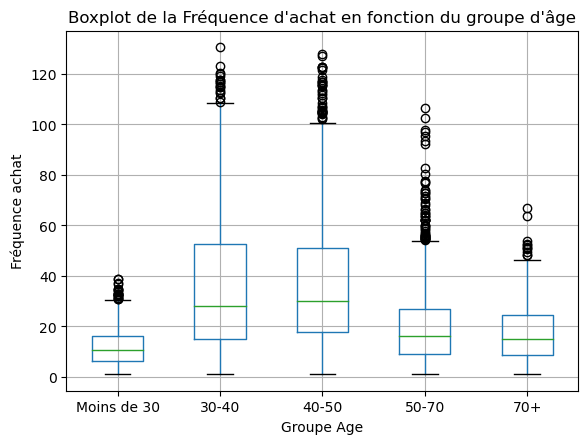

In [99]:
# Afficher le boxplot de la féquence des achat
df_freq_age_myn.boxplot('freq_achat', by='groupe_age')

plt.xlabel('Groupe Age')
plt.ylabel('Fréquence achat')
plt.title("Boxplot de la Fréquence d'achat en fonction du groupe d'âge")
plt.suptitle("") # Retirer le titre automatique
plt.show()

#### Tester la significativité des différences entre les groupes par ANOVA

In [100]:
# Test par ANOVA sur les catégories et le panier moyen

groupe1 = df_freq_age_myn[df_freq_age_myn['groupe_age'] == 'Moins de 30']['freq_achat']
groupe2 = df_freq_age_myn[df_freq_age_myn['groupe_age'] == '30-40']['freq_achat']
groupe3 = df_freq_age_myn[df_freq_age_myn['groupe_age'] == '40-50']['freq_achat']
groupe4 = df_freq_age_myn[df_freq_age_myn['groupe_age'] == '50-70']['freq_achat']
groupe5 = df_freq_age_myn[df_freq_age_myn['groupe_age'] == '70+']['freq_achat']

stat, p_value = f_oneway(groupe1, groupe2, groupe3, groupe4, groupe5)
print('Statistique de test :', stat)
print('P-valeur :', p_value)

Statistique de test : 664.823805542373
P-valeur : 0.0


#### Tester la normalité avec le test de Shapiro-Wilk

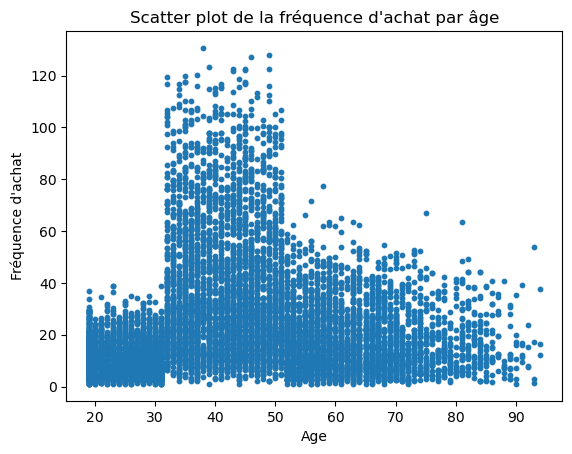

In [102]:
plt.scatter(df_freq_age_myn['age'], df_freq_age_myn['freq_achat'], s=10)

# Axes et titre
plt.xlabel('Age')
plt.ylabel('Fréquence d\'achat')
plt.title('Scatter plot de la fréquence d\'achat par âge')

plt.show()

In [103]:
from scipy.stats import shapiro

# Extraire une série pour la fréquence d'achat et l'âge
freq_achat = df_freq_age_myn['freq_achat']

# Shapiro-Wilk test
statistic, p_value = shapiro(freq_achat)

# print les résultats
print('Shapiro-Wilk statistic:', statistic)
print('P-value:', p_value)

Shapiro-Wilk statistic: 0.8180756568908691
P-value: 0.0


C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Tester la normalité de la distribution avec le test de Kosmogorov Smirnof (échantillon > 5000)

In [104]:
from scipy.stats import kstest, norm

# Extraire une série pour la fréquence d'achat et l'âge
freq_achat = df_freq_age_myn['freq_achat']

# Calculer la moyenne et l'écart type des fréquences d'achat
mu, sigma = norm.fit(freq_achat)

z_scores = (freq_achat - mu) / sigma

ks_statistic, p_value = kstest(z_scores, 'norm')

# Afficher les résultats
print('Kolmogorov-Smirnov statistic:', ks_statistic)
print('P-value:', p_value)

Kolmogorov-Smirnov statistic: 0.15561268501782005
P-value: 3.281043437966828e-182


La P-Value étant inférieure à 0.05, la distribution suit la normale.

**On ne peut donc pas établir de relation de corrélation linéaire entre les variables âge et fréquence d'achat.**  

(Notons qu'on pourrait le faire en scindant l'échantillon en 2 : corrélation positive jusqu'à 40 ans puis négative jusqu'à 90 ans par exemple)

***

### Âge et Montant total des achats

#### Observations

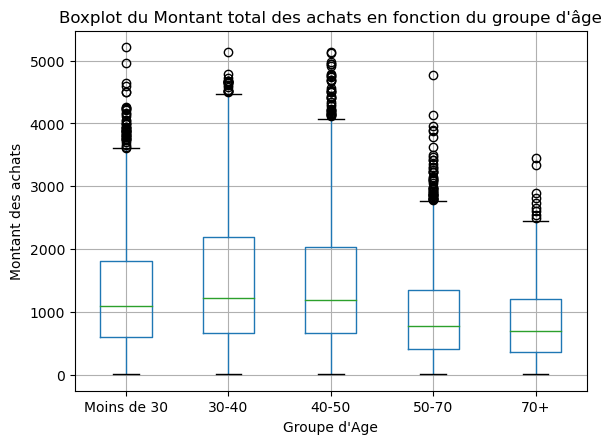

In [105]:
# Afficher le boxplot de la féquence des achat
df_clients_sans_outliers.boxplot('montant_total', by='groupe_age')

plt.xlabel('Groupe d\'Age')
plt.ylabel('Montant des achats')
plt.title("Boxplot du Montant total des achats en fonction du groupe d'âge")
plt.suptitle("") # Retirer le titre automatique
plt.show()

In [106]:
# Test par ANOVA sur les catégories et le panier moyen

groupe1 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == 'Moins de 30']['montant_total']
groupe2 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '30-40']['montant_total']
groupe3 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '40-50']['montant_total']
groupe4 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '50-70']['montant_total']
groupe5 = df_clients_sans_outliers[df_clients_sans_outliers['groupe_age'] == '70+']['montant_total']

stat, p_value = f_oneway(groupe1, groupe2, groupe3, groupe4, groupe5)
print('Statistique de test :', stat)
print('P-valeur :', p_value)

Statistique de test : 156.85779583001195
P-valeur : 9.311669837129891e-130


La P-value étant inférieure à 0.05 on peut rejeter l'hypothèse nulle selon laquelle les catégories seraient similaires. 

On peut donc conclure qu'**il existe un lien entre la catégorie d'âge et le montant total des achats**. 

Toutefois à nuancer, étant donné que notre échantillon est très large la p-value est très rapidement sous les 5%.

In [112]:
pearson_coef = df_clients_sans_outliers['age'].corr(df_clients_sans_outliers['montant_total'], method='pearson')

print(pearson_coef)

-0.18374686087452727


Le coefficient de Pearson indique **qu'il n'y a pas de relation de corrélation entre l'âge et le montant total des achats** (customer lifetime value). 

#### Graphique en bâtons

In [107]:
# Ajouter le groupe d'age dans le df client final
df_clients_final_groupe = df_clients_final.sort_values(by='age', ascending=True)

df_clients_final_groupe['groupe_age'] = pd.cut(df_clients_final_groupe['age'], bins=bins, labels=labels)

df_clients_final_groupe.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,mois,annee,time,CA_cumule,age,groupe_age
342519,c_1934,f,2004.0,0_1473,2021-12-24,s_139431,15.99,0,2021-12,2021,19:19:42.033041,5.568136e+06,19,Moins de 30
94534,c_1105,m,2004.0,1_606,2021-07-15,s_62746,28.00,1,2021-07,2021,19:20:18.975790,1.755977e+06,19,Moins de 30
540529,c_3425,m,2004.0,1_671,2022-08-06,s_249219,31.99,1,2022-08,2022,12:35:28.901082,8.928567e+06,19,Moins de 30
540528,c_3425,m,2004.0,1_671,2021-03-06,s_2540,31.99,1,2021-03,2021,12:35:28.901082,8.928535e+06,19,Moins de 30
673378,c_652,m,2004.0,2_224,2022-11-24,s_302237,87.40,2,2022-11,2022,20:43:39.789315,1.170820e+07,19,Moins de 30


In [108]:
# Pivot table date / groupe age (montant moyen)
df_groupe_montant = df_clients_final_groupe.groupby(['mois','groupe_age'])['price'].sum().reset_index()

df_groupe_montant_pivot = df_groupe_montant.pivot(index=['mois'], columns='groupe_age', values='price')

df_groupe_montant_pivot.head()

groupe_age,Moins de 30,30-40,40-50,50-70,70+
mois,,,,,
2021-03,99863.90,112306.84,110658.92,100762.33,22326.72
2021-04,108840.43,108279.60,109123.72,92272.37,20821.73
2021-05,121578.72,106844.24,111847.74,91873.09,22743.67
2021-06,122937.01,101401.06,104646.40,95829.79,22287.91
2021-07,142035.26,96298.35,93681.57,94065.90,21512.07


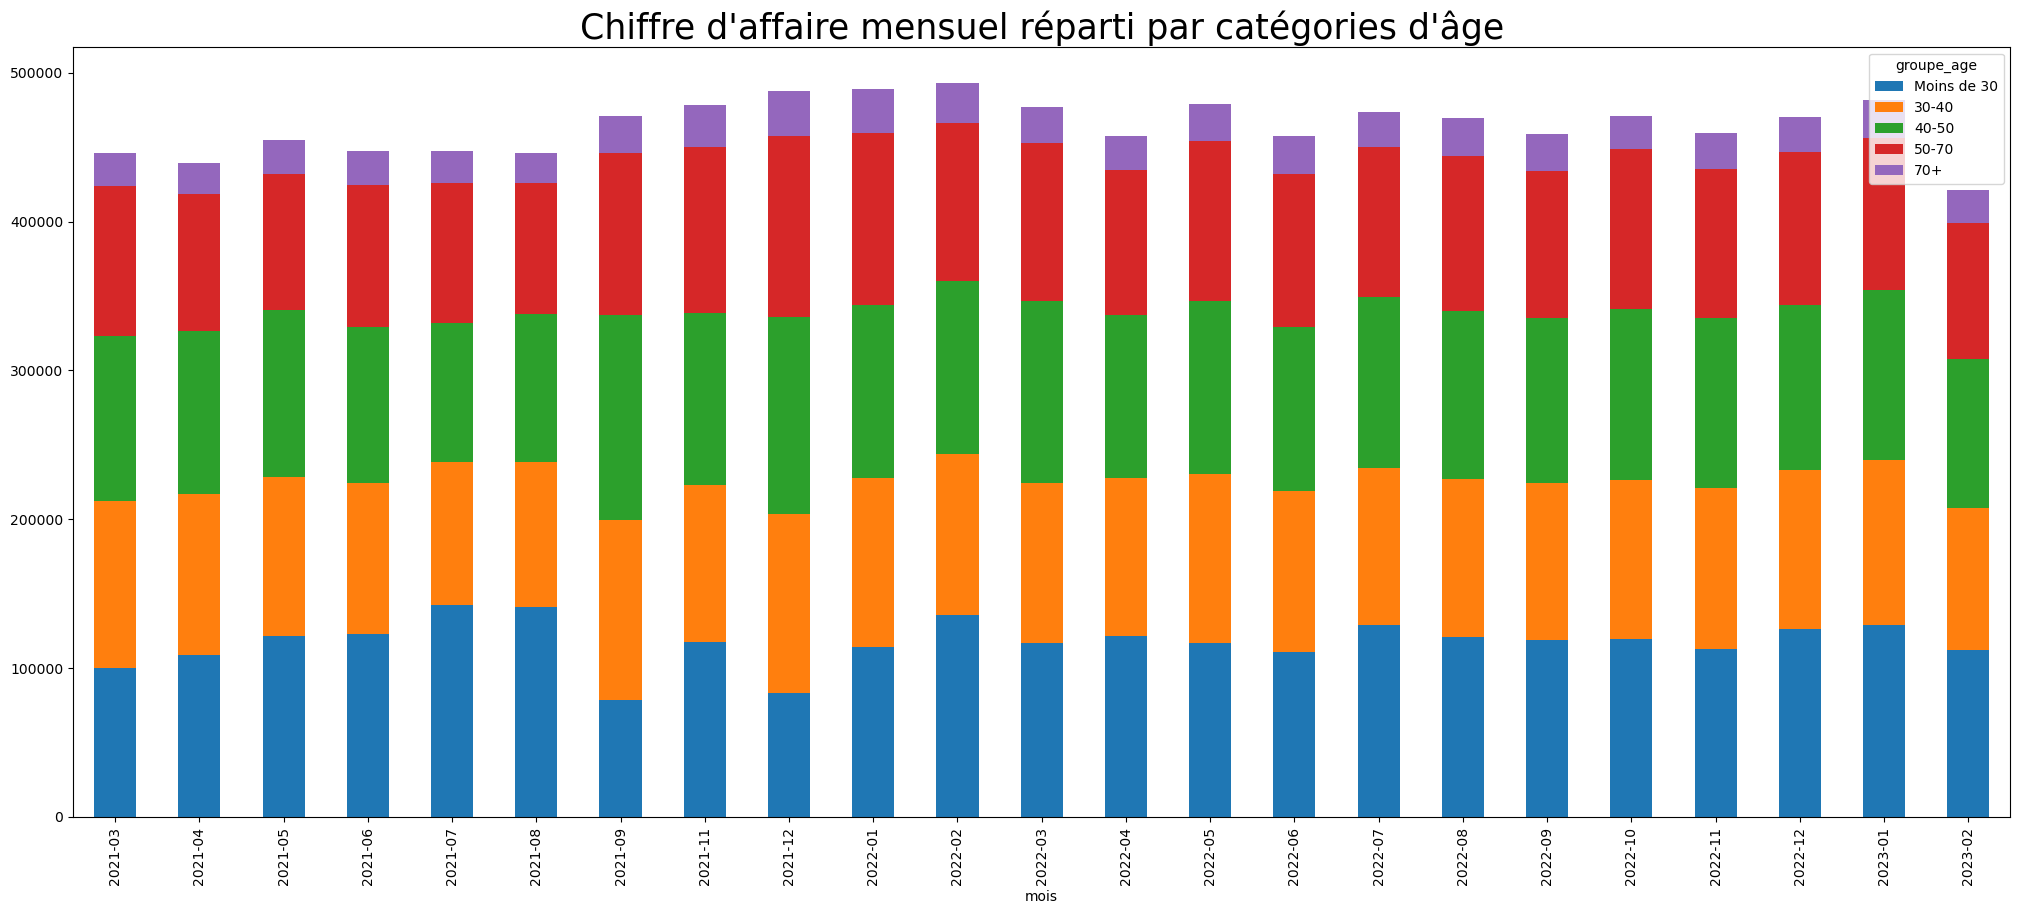

In [109]:
# Afficher le graphique en barre empilé avec le CA par catégorie
df_groupe_montant_pivot.plot.bar(y=[0, 1, 2, 3, 4], stacked=True, figsize=(25,10))

plt.title("Chiffre d'affaire mensuel réparti par catégories d'âge", fontsize=25)

plt.show()

In [110]:
# Même chose par date pour faire le graphique en version journalière
df_groupe_montant_jour = df_clients_final_groupe.groupby(['date','groupe_age'])['price'].sum().reset_index()

df_groupe_montant_jour_pivot = df_groupe_montant_jour.pivot(index=['date'], columns='groupe_age', values='price')

df_groupe_montant_jour_pivot.head()

groupe_age,Moins de 30,30-40,40-50,50-70,70+
date,,,,,
2021-03-01,3692.16,3504.13,3727.14,3885.69,659.53
2021-03-02,3400.33,3907.09,3216.18,3281.30,753.57
2021-03-03,3016.75,3669.12,3809.87,2735.14,669.11
2021-03-04,2990.38,3306.13,3058.37,3249.30,963.44
2021-03-05,4059.38,4230.94,3707.25,3669.11,549.41


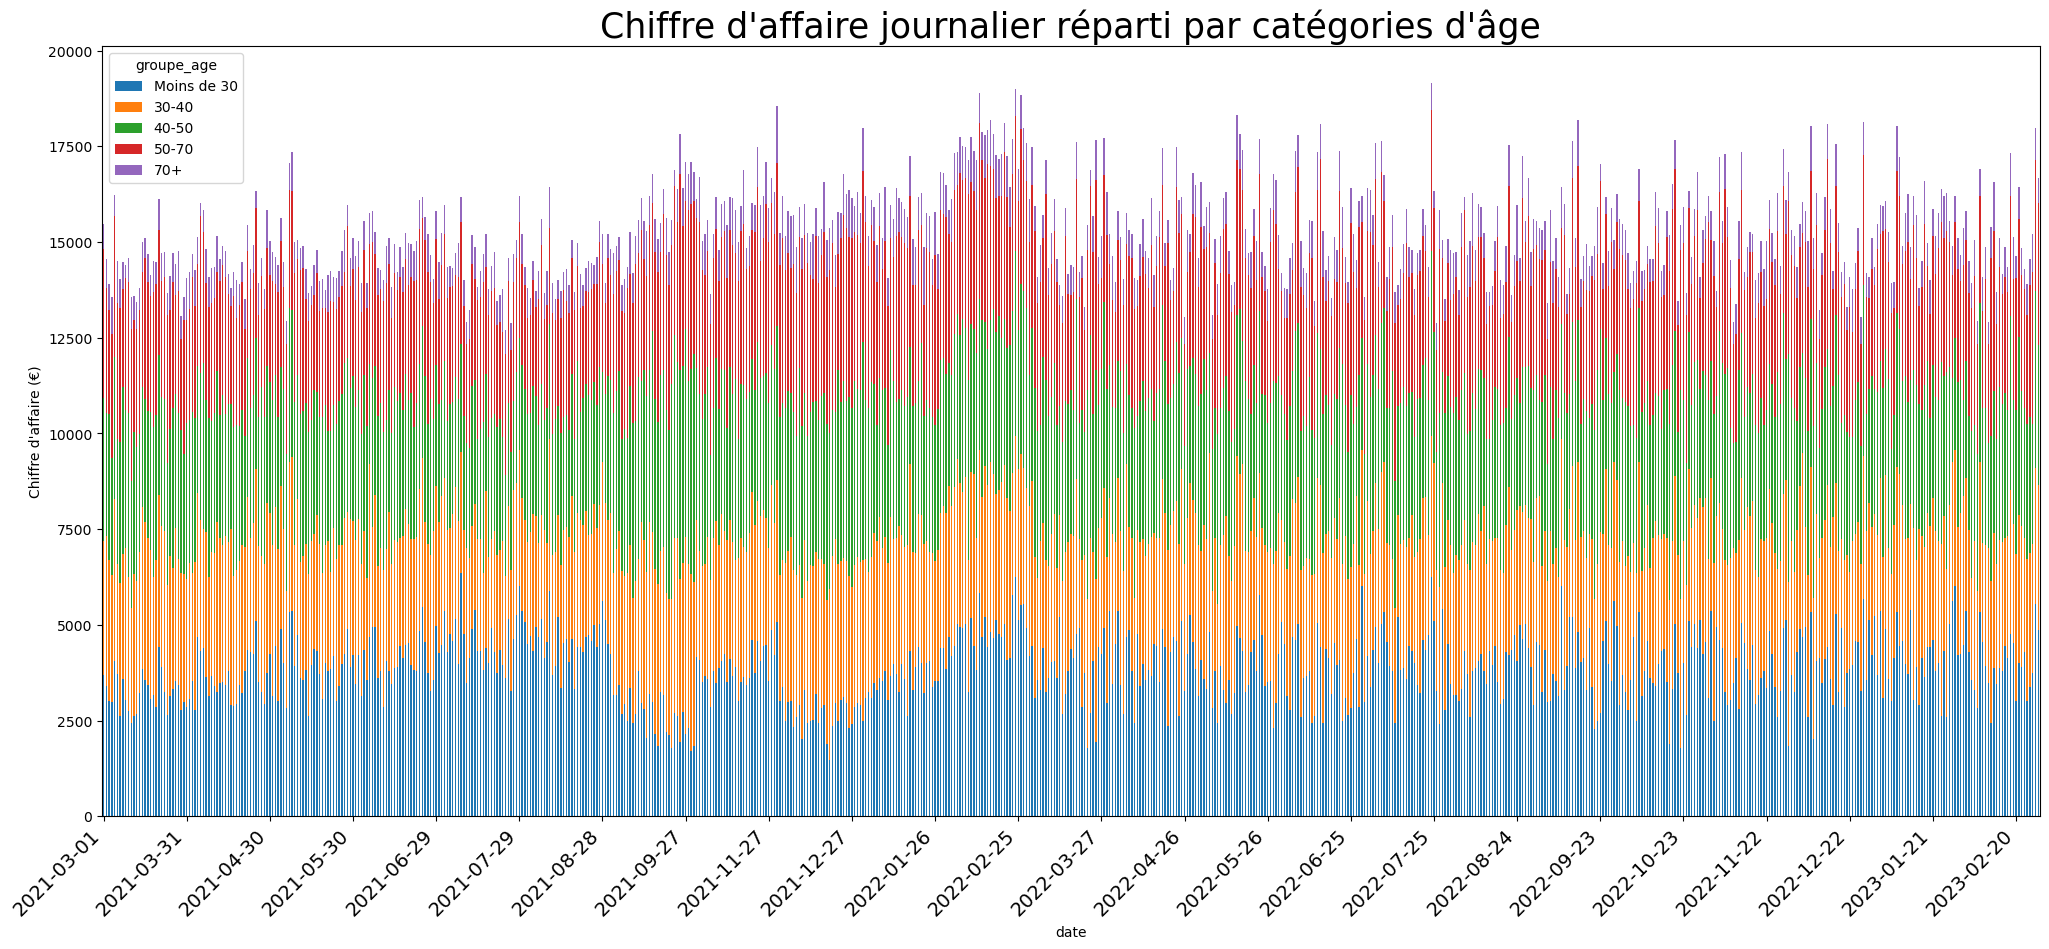

In [111]:
# Afficher le graphique 
n = 30 # display every 10th date
x_ticks = np.arange(0, len(df_groupe_montant_jour_pivot.index), n)
x_labels = df_groupe_montant_jour_pivot.index[x_ticks]

df_groupe_montant_jour_pivot.plot.bar(y=[0, 1, 2, 3, 4], stacked=True, figsize=(25,10))
plt.xticks(x_ticks, x_labels, rotation=45, ha="right", fontsize=14)
plt.ylabel('Chiffre d\'affaire (€)')
plt.title("Chiffre d'affaire journalier réparti par catégories d'âge", fontsize=25)

plt.show()